[1] Wczytaj dane do DataFrame przy użyciu biblioteki Pandas. Wykonaj operacje, które pozwolą Ci wyświetlić podstawowe informacje o DataFrame, takie jak pierwsze i ostatnie wiersze, nazwy kolumn oraz statystyki opisowe. 

Dane: [[1, 2 ,3 ], [4, 5, 6], [7, 8, 9]], Kolumny: ['A', 'B', 'C']

In [9]:
import pandas as pd
import numpy as np

df = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]], 
                  columns=["A", "B", "C"])

In [11]:
df.head()

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9
3,10,11,12


In [12]:
df.tail()

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9
3,10,11,12


In [15]:
df.columns

Index(['A', 'B', 'C'], dtype='object')

In [16]:
df.describe()

,A,B,C
count,4.000000,4.000000,4.000000
mean,5.500000,6.500000,7.500000
std,3.872983,3.872983,3.872983
min,1.000000,2.000000,3.000000
25%,3.250000,4.250000,5.250000
50%,5.500000,6.500000,7.500000
75%,7.750000,8.750000,9.750000
max,10.000000,11.000000,12.000000


[2] Wykonaj analizę unikalnych wartości w kolumnach oraz sprawdź kształt i rozmiar DataFrame. Zrób użycie funkcji nunique(), unique() na kolumnie 'A', shape oraz size, aby uzyskać więcej informacji na temat danych. 

In [18]:
df.nunique()

A    4
B    4
C    4
dtype: int64

In [20]:
df['A'].unique()

array([ 1,  4,  7, 10])

In [21]:
df.shape

(4, 3)

In [22]:
df.size

12

[3] Wykonaj operacje, które pozwolą Ci załadować dane z plików (coffee, results, bios, olympics-data) CSV, Parquet oraz Excel

In [29]:
coffee = pd.read_csv('./data/coffee.csv')
results = pd.read_parquet('./data/results.parquet')
bios = pd.read_csv('./data/bios.csv')
olympics_data = pd.read_excel('./data/olympics-data.xlsx')

[4] Wykonaj operacje na zbiorze coffee, które pozwolą Ci uzyskać dostęp do różnych wierszy i kolumn w DataFrame
- Wybór 4 wiersza za pomocą loc
- Wybór wierszy 2-4
- Wybór wierszy 2-4 oraz Kolumn 'Day' & 'Units Sold'
- Wybór 5 losowych wierszy

In [30]:
coffee.loc[3]

Day            Tuesday
Coffee Type      Latte
Units Sold          20
Name: 3, dtype: object

In [32]:
coffee.loc[1:3]

,Day,Coffee Type,Units Sold
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20


In [34]:
coffee.loc[1:3, ['Day', 'Units Sold']]

,Day,Units Sold
1,Monday,15
2,Tuesday,30
3,Tuesday,20


In [35]:
coffee.sample(5)

,Day,Coffee Type,Units Sold
3,Tuesday,Latte,20
8,Friday,Espresso,45
2,Tuesday,Espresso,30
12,Sunday,Espresso,45
1,Monday,Latte,15


[5] Wykonaj operacje na zbiorze coffee, które pozwolą Ci uzyskać dostęp do wybranych kolumn oraz wierszy w DataFrame. Użyj metod iloc oraz loc
- Ustaw kolumne 'Day' na indeks zbiory
- Wybierz dane dla dni 'Monday' & 'Friday'

In [50]:
coffee.set_index('Day')


,Coffee Type,Units Sold
Day,,
Monday,Espresso,25
Monday,Latte,15
Tuesday,Espresso,30
Tuesday,Latte,20
Wednesday,Espresso,35
Wednesday,Latte,25
Thursday,Espresso,40
Thursday,Latte,30
Friday,Espresso,45


In [56]:
coffee.loc[(coffee['Day'] == 'Monday') | (coffee['Day'] == 'Friday')]

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
8,Friday,Espresso,45
9,Friday,Latte,35


[6] Ustaw wartość 10 dla pierwszych 3 dni, a następnie Wybierz wartość 'Units Sold' dla 4 rekordu dnia (Ma to być pojedyńcza wartość) za pomocą 'at' & 'iat'

In [58]:
coffee.loc[0:2, "Units Sold"] = 10

In [60]:
coffee.at[3, "Units Sold"]

np.int64(20)

In [65]:
coffee.iat[3, 2]

np.int64(20)

[7] Zrób operacje sortowania danych oraz iteracji przez DataFrame. Wykonaj sortowanie według liczby sprzedanych jednostek oraz iterację przez wszystkie wiersze, aby wyświetlić typ kawy dla każdego dnia. 

In [67]:
sorted_coffee = coffee.sort_values(by="Units Sold", ascending=False)
sorted_coffee

,Day,Coffee Type,Units Sold
8,Friday,Espresso,45
10,Saturday,Espresso,45
12,Sunday,Espresso,45
6,Thursday,Espresso,40
4,Wednesday,Espresso,35
9,Friday,Latte,35
11,Saturday,Latte,35
13,Sunday,Latte,35
7,Thursday,Latte,30
5,Wednesday,Latte,25


In [68]:
for index, row in coffee.iterrows():
    print(f"Dzień: {row['Day']}, Typ kawy: {row['Coffee Type']}, Sprzedane jednostki: {row['Units Sold']}")

Dzień: Monday, Typ kawy: Espresso, Sprzedane jednostki: 10
Dzień: Monday, Typ kawy: Latte, Sprzedane jednostki: 10
Dzień: Tuesday, Typ kawy: Espresso, Sprzedane jednostki: 10
Dzień: Tuesday, Typ kawy: Latte, Sprzedane jednostki: 20
Dzień: Wednesday, Typ kawy: Espresso, Sprzedane jednostki: 35
Dzień: Wednesday, Typ kawy: Latte, Sprzedane jednostki: 25
Dzień: Thursday, Typ kawy: Espresso, Sprzedane jednostki: 40
Dzień: Thursday, Typ kawy: Latte, Sprzedane jednostki: 30
Dzień: Friday, Typ kawy: Espresso, Sprzedane jednostki: 45
Dzień: Friday, Typ kawy: Latte, Sprzedane jednostki: 35
Dzień: Saturday, Typ kawy: Espresso, Sprzedane jednostki: 45
Dzień: Saturday, Typ kawy: Latte, Sprzedane jednostki: 35
Dzień: Sunday, Typ kawy: Espresso, Sprzedane jednostki: 45
Dzień: Sunday, Typ kawy: Latte, Sprzedane jednostki: 35


[8] Na zbiorze `bios` przefiltruj dane i wyświetl `name` oraz `height_cm` osoby między 180cm a 210cm, urodziły się w `USA` i w imieniu mają literę 'k'

In [69]:
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


In [79]:
bios[(bios['height_cm'] > 180) & (bios['height_cm'] > 210) & (bios['name'].str.contains('k')) & (bios['born_country'] == 'USA')][['name', 'height_cm']]

,name,height_cm
6393,Jon Koncak,213.0
142044,Jahlil Okafor,211.0
142930,Mike Tobey,213.0


[9] Zapoznaj się z ponizszymi "regexami" i zapamiętaj jakie mozliowsci oferuje ta składnia

In [81]:
# Find athletes born in cities that start with a vowel:
vowel_cities = bios[bios['born_city'].str.contains(r'^[AEIOUaeiou]', na=False)]

# Find athletes with names that contain exactly two vowels:
two_vowels = bios[bios['name'].str.contains(r'^[^AEIOUaeiou]*[AEIOUaeiou][^AEIOUaeiou]*[AEIOUaeiou][^AEIOUaeiou]*$', na=False)]

# Find athletes with names that have repeated consecutive letters (e.g., "Aaron", "Emmett"):
repeated_letters = bios[bios['name'].str.contains(r'(.)\1', na=False)]

# Find athletes with names ending in 'son' or 'sen':
son_sen_names = bios[bios['name'].str.contains(r'son$|sen$', case=False, na=False)]

# Find athletes born in a year starting with '19':
born_19xx = bios[bios['born_date'].str.contains(r'^19', na=False)]

# Find athletes with names that do not contain any vowels:
no_vowels = bios[bios['name'].str.contains(r'^[^AEIOUaeiou]*$', na=False)]

# Find athletes whose names contain a hyphen or an apostrophe:
hyphen_apostrophe = bios[bios['name'].str.contains(r"[-']", na=False)]

# Find athletes with names that start and end with the same letter:
start_end_same = bios[bios['name'].str.contains(r'^(.).*\1$', na=False, case=False)]

# Find athletes with a born_city that has exactly 7 characters:
city_seven_chars = bios[bios['born_city'].str.contains(r'^.{7}$', na=False)]

# Find athletes with names containing three or more vowels:
three_or_more_vowels = bios[bios['name'].str.contains(r'([AEIOUaeiou].*){3,}', na=False)]

/var/folders/fw/fg0_f2fx5tn55v9k_2zxd6d00000gn/T/ipykernel_68987/207626235.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  repeated_letters = bios[bios['name'].str.contains(r'(.)\1', na=False)]
/var/folders/fw/fg0_f2fx5tn55v9k_2zxd6d00000gn/T/ipykernel_68987/207626235.py:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  start_end_same = bios[bios['name'].str.contains(r'^(.).*\1$', na=False, case=False)]
/var/folders/fw/fg0_f2fx5tn55v9k_2zxd6d00000gn/T/ipykernel_68987/207626235.py:29: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  three_or_more_vowels = bios[bios['name'].str.contains(r'([AEIOUaeiou].*){3,}', na=False)]


[10] Wyszukaj wszystkie osoby urodzone w Stanach, USA oraz Wielkiej Brytani, których imię zaczyną się na `Keith`

In [82]:
bios[bios['born_country'].isin(["USA", "FRA", "GBR"]) & (bios['name'].str.startswith("Keith"))]

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
3505,3517,Keith Wallace,1961-03-29,Preston,England,GBR,Great Britain,165.0,51.0,1999-12-31
12053,12118,Keith Hervey,1898-11-03,Fulham,England,GBR,Great Britain,NaN,NaN,1973-02-22
14577,14674,Keith Harrison,1933-03-28,Birmingham,England,GBR,Great Britain,NaN,NaN,NaN
16166,16281,Keith Reynolds,1963-12-25,Solihull,England,GBR,Great Britain,173.0,68.0,NaN
18734,18862,Keith Sinclair,1945-06-26,Sunderland,England,GBR,Great Britain,190.0,79.0,NaN
29897,30123,Keith Langley,1961-06-03,Aldershot,England,GBR,Great Britain,173.0,70.0,NaN
34011,34275,Keith Remfry,1947-11-17,Ealing,England,GBR,Great Britain,193.0,114.0,2015-09-16
46885,47234,Keith Collin,1937-01-18,Marylebone,England,GBR,Great Britain,168.0,63.0,1991-03-06
50929,51288,Keith Carter,1924-08-30,Akron,Ohio,USA,United States,NaN,NaN,2013-05-03
51185,51544,Keith Russell,1948-01-15,Mesa,Arizona,USA,United States,188.0,73.0,NaN


[11] Za pomocą Query functions wyszukaj osoby urodzone w Stanach w Mieście Seattle

In [83]:
bios.query('born_country == "USA" and born_city == "Seattle"')

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
11030,11088,David Halpern,1955-08-18,Seattle,Washington,USA,United States,178.0,79.0,NaN
12800,12870,Todd Trewin,1958-04-20,Seattle,Washington,USA,United States,180.0,75.0,NaN
15476,15583,Scott McKinley,1968-10-15,Seattle,Washington,USA,United States,183.0,75.0,NaN
29079,29293,Joyce Tanac,1950-09-27,Seattle,Washington,USA,United States,156.0,49.0,NaN
31135,31371,Bill Kuhlemeier,1908-01-14,Seattle,Washington,USA,United States,NaN,NaN,2001-07-08
...,...,...,...,...,...,...,...,...,...,...
133392,136331,Hans Struzyna,1989-03-31,Seattle,Washington,USA,United States,188.0,91.0,NaN
135448,138662,Maude Davis Crossland,2003-03-19,Seattle,Washington,USA,Colombia,NaN,NaN,NaN
136993,140229,Jenell Berhorst,2003-12-13,Seattle,Washington,USA,United States,NaN,NaN,NaN
143507,147159,Nevin Harrison,2002-06-02,Seattle,Washington,USA,United States,175.0,73.0,NaN


[12] Na zbiorze `coffee` ustaw cene dla kazdego produktu na 3.50, a następnie dodaj nową 
kolumnę o nazwie 'new_price' która w zaleznosci, czy będzie to espresso nada cene 2.2, a w innnym wypadku 6.99

In [87]:
coffee['price'] = 3.50
coffee.head()

,Day,Coffee Type,Units Sold,price
0,Monday,Espresso,10,3.5
1,Monday,Latte,10,3.5
2,Tuesday,Espresso,10,3.5
3,Tuesday,Latte,20,3.5
4,Wednesday,Espresso,35,3.5


In [90]:
coffee['new_price'] = np.where(coffee['Coffee Type'] == 'Espresso', 2.2, 6.99)
coffee.head()

,Day,Coffee Type,Units Sold,price,new_price
0,Monday,Espresso,10,3.5,2.20
1,Monday,Latte,10,3.5,6.99
2,Tuesday,Espresso,10,3.5,2.20
3,Tuesday,Latte,20,3.5,6.99
4,Wednesday,Espresso,35,3.5,2.20


[13] Usuń kolumnę `price` z tabeli, natomiast dodaj nową o nazwie `revenue` która będzie iloczynem `Units Sold` oraz `new_price`

In [92]:
coffee.drop(columns=['price'], inplace=True)

In [94]:
coffee['revenue'] = coffee['Units Sold'] * coffee['new_price']
coffee.head()

,Day,Coffee Type,Units Sold,new_price,revenue
0,Monday,Espresso,10,2.20,22.0
1,Monday,Latte,10,6.99,69.9
2,Tuesday,Espresso,10,2.20,22.0
3,Tuesday,Latte,20,6.99,139.8
4,Wednesday,Espresso,35,2.20,77.0


[14] Zamień kolumnę `new_price` na `price`

In [95]:
coffee.rename(columns={'new_price': 'price'}, inplace=True)
coffee.head()

,Day,Coffee Type,Units Sold,price,revenue
0,Monday,Espresso,10,2.20,22.0
1,Monday,Latte,10,6.99,69.9
2,Tuesday,Espresso,10,2.20,22.0
3,Tuesday,Latte,20,6.99,139.8
4,Wednesday,Espresso,35,2.20,77.0


[15] Stwórz kopię zbioru bios o nazwie `bios_new` i dodaj kolumnę z wartością `first_name`

In [96]:
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


In [99]:
bios_new = bios.copy()
bios['first_name'] = bios['name'].str.split(' ').str[0]
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,first_name
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,Jean-François
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,Arnaud
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,Jean
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,Jacques
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,Albert


[16] Dodaj kolumnę `born_year`, która jak sama nazwa mówi, będzie zawierać rok urodzenia, wyświetl nazwe oraz rok urodzenia osoby i zapisz ten widok do pliku `bios_new.csv`


In [104]:
bios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145500 entries, 0 to 145499
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   athlete_id    145500 non-null  int64  
 1   name          145500 non-null  object 
 2   born_date     143693 non-null  object 
 3   born_city     110908 non-null  object 
 4   born_region   110908 non-null  object 
 5   born_country  110908 non-null  object 
 6   NOC           145499 non-null  object 
 7   height_cm     106651 non-null  float64
 8   weight_kg     102070 non-null  float64
 9   died_date     33940 non-null   object 
 10  first_name    145500 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 12.2+ MB


In [106]:
bios_new['born_year'] = pd.to_datetime(bios_new['born_date']).dt.year

In [112]:
bios_new = bios_new[['name', 'born_year']]
bios_new.head()
bios_new.to_csv('./data/bios_new.csv', index=False)

[17] Stwórz funkcję kategoryzującą osobe o warunkach:
- wysokość < 175 & waga < 70 -> 'Lightweigh'
- wysokość < 185 & waga < 80 -> 'Middleweight'
- 'Heavyweight'

i dodaj kolumnę 'category' wraz z odpowiednimi wartościami

In [114]:
def categorize_athlete(row):
    if row['height_cm'] < 175 and row['weight_kg'] < 70:
        return 'Lightweight'
    elif row['height_cm'] < 185 or row['weight_kg'] <= 80:
        return 'Middleweight'
    
    else:
        return 'Heavyweight'
    
bios['Category'] = bios.apply(categorize_athlete, axis=1)
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,first_name,Category
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,Jean-François,Heavyweight
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,Arnaud,Middleweight
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,Jean,Middleweight
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,Jacques,Lightweight
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,Albert,Heavyweight


[18] Operując na zbiorach `bios` & `noc_regions` połącz dane uzywając złączenia `left` jako klucze wybierz odpowiednie kolumny. Następnie wybierz sportowców z `USA` oraz `GBR` i złącz je w całość 

In [117]:
nocs = pd.read_csv('./data/noc_regions.csv')
bios_new = pd.merge(bios, nocs, left_on='born_country', right_on='NOC', how='left')
bios_new.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC_x,height_cm,weight_kg,died_date,first_name,Category,NOC_y,region,notes
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,Jean-François,Heavyweight,FRA,France,NaN
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,Arnaud,Middleweight,FRA,France,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,Jean,Middleweight,FRA,France,NaN
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,Jacques,Lightweight,FRA,France,NaN
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,Albert,Heavyweight,GBR,UK,NaN


In [119]:
usa = bios[bios['born_country'] == 'USA'].copy()
gbr = bios[bios['born_country'] == 'GBR'].copy()

In [120]:
new_df = pd.concat([usa, gbr])
new_df.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,first_name,Category
54,55,Monique Javer,1967-07-22,Burlingame,California,USA,Great Britain,177.0,64.0,NaN,Monique,Middleweight
960,964,Xóchitl Escobedo,1968-09-17,West Covina,California,USA,Mexico,170.0,60.0,NaN,Xóchitl,Lightweight
961,965,Angélica Gavaldón,1973-10-03,El Centro,California,USA,Mexico,160.0,54.0,NaN,Angélica,Lightweight
1231,1238,Bert Schneider,1897-07-01,Cleveland,Ohio,USA,Canada,NaN,NaN,1986-02-20,Bert,Heavyweight
1345,1352,Laura Berg,1975-01-06,Santa Fe Springs,California,USA,United States,168.0,61.0,NaN,Laura,Lightweight


[19] Ustaw wartość `nan` jako numpy dla wierszy 1 i
 3, dla kolumny `Units Sold` i uzupełnij je średnią pozostalych, następnie powtórz czynność i wypełnij je za pomocą fukcji `interpolate`. Sprawdz na czym polega róznica

In [123]:
coffee.loc[[0,2], 'Units Sold'] = np.nan

In [125]:
coffee["Units Sold"].fillna(coffee['Units Sold'].mean())

0     33.333333
1     10.000000
2     33.333333
3     20.000000
4     35.000000
5     25.000000
6     40.000000
7     30.000000
8     45.000000
9     35.000000
10    45.000000
11    35.000000
12    45.000000
13    35.000000
Name: Units Sold, dtype: float64

In [127]:
coffee.loc[[0,2], 'Units Sold'] = np.nan
coffee["Units Sold"].fillna(coffee['Units Sold'].interpolate())

0      NaN
1     10.0
2     15.0
3     20.0
4     35.0
5     25.0
6     40.0
7     30.0
8     45.0
9     35.0
10    45.0
11    35.0
12    45.0
13    35.0
Name: Units Sold, dtype: float64

[20] Ustaw wartość `nan` dla pierwszych 3 wierszy kolumny `Units Sold` a następnie wyświetl tylko te które mają tam wartość

In [137]:
coffee.iloc[:3, coffee.columns.get_loc('Units Sold')] = np.nan
coffee[coffee['Units Sold'].notna()]

,Day,Coffee Type,Units Sold,price,revenue
3,Tuesday,Latte,20.0,6.99,139.80
4,Wednesday,Espresso,35.0,2.20,77.00
5,Wednesday,Latte,25.0,6.99,174.75
6,Thursday,Espresso,40.0,2.20,88.00
7,Thursday,Latte,30.0,6.99,209.70
8,Friday,Espresso,45.0,2.20,99.00
9,Friday,Latte,35.0,6.99,244.65
10,Saturday,Espresso,45.0,2.20,99.00
11,Saturday,Latte,35.0,6.99,244.65
12,Sunday,Espresso,45.0,2.20,99.00


[21] Sprawdź ilość urodzeń na zbiorze `bios` w kazdym miescie

In [139]:
bios['born_city'].value_counts()

born_city
Budapest           1378
Moskva (Moscow)     883
Oslo                708
Stockholm           629
Praha (Prague)      600
                   ... 
Bodrogkisfalud        1
Ternberg              1
Klaus                 1
Plaški                1
Dulwich Hill          1
Name: count, Length: 22368, dtype: int64

[22] Na zbiorze `coffee` wyświetl ilość sprzedanych jednostek, grupując kawy po ich rodzaju, a następnie średnią

In [140]:
coffee.groupby(['Coffee Type'])['Units Sold'].sum()

Coffee Type
Espresso    210.0
Latte       180.0
Name: Units Sold, dtype: float64

In [142]:
coffee.groupby(['Coffee Type'])['Units Sold'].mean()


Coffee Type
Espresso    42.0
Latte       30.0
Name: Units Sold, dtype: float64

[23] Zaagreguj widok po kolumnach `Coffee Type` & `Day` po funkcjach `sum` dla `Units Sold`

In [144]:
coffee.groupby(['Coffee Type', 'Day']).agg({'Units Sold': 'sum'})

Units Sold
Coffee Type Day                  
Espresso    Friday           45.0
            Monday            0.0
            Saturday         45.0
            Sunday           45.0
            Thursday         40.0
            Tuesday           0.0
            Wednesday        35.0
Latte       Friday           35.0
            Monday            0.0
            Saturday         35.0
            Sunday           35.0
            Thursday         30.0
            Tuesday          20.0
            Wednesday        25.0

[24] Uzywając pivot wykaz dochody, dla poszczegolnych kaw, na przestrzeni calego zbioru, a następnie to samo dla poszczególnych dni

In [149]:
pivot = coffee.pivot(columns='Coffee Type', index='Day', values='revenue')
pivot.sum()

Coffee Type
Espresso     506.0
Latte       1328.1
dtype: float64

In [150]:
pivot.sum(axis=1)

Day
Friday       343.65
Monday        91.90
Saturday     343.65
Sunday       343.65
Thursday     297.70
Tuesday      161.80
Wednesday    251.75
dtype: float64

[25] Pogrupuj wartości ze względu na rok i miesiąc, sortując po imieniu malejąco. Zbiór `bios`

In [154]:
bios['born_date'] = pd.to_datetime(bios['born_date'])
bios['month_born'] = bios['born_date'].dt.month
bios['year_born'] = bios['born_date'].dt.year
bios.groupby([bios['year_born'],bios['month_born']])['name'].count().reset_index().sort_values('name', ascending=False)

,year_born,month_born,name
1437,1970.0,1.0,239
1461,1972.0,1.0,229
1629,1986.0,1.0,227
1497,1975.0,1.0,227
1617,1985.0,1.0,225
...,...,...,...
95,1857.0,5.0,1
96,1857.0,7.0,1
97,1857.0,8.0,1
98,1857.0,9.0,1


[26] Za pomocą funckji `rolling` dla kazdego dnia dodaj kolumne i dochodem z ostatnich 3 dni dla kawy latte. (`coffee`)

In [155]:
latte = coffee[coffee['Coffee Type']=="Latte"].copy()
latte['3day'] = latte['Units Sold'].rolling(3).sum()
latte

,Day,Coffee Type,Units Sold,price,revenue,3day
1,Monday,Latte,NaN,6.99,69.90,NaN
3,Tuesday,Latte,20.0,6.99,139.80,NaN
5,Wednesday,Latte,25.0,6.99,174.75,NaN
7,Thursday,Latte,30.0,6.99,209.70,75.0
9,Friday,Latte,35.0,6.99,244.65,90.0
11,Saturday,Latte,35.0,6.99,244.65,100.0
13,Sunday,Latte,35.0,6.99,244.65,105.0


[27] Przenalizuj ponizszy kod, i utrwal widzę na ten temat, jakie róznice występują w tych zapisach

In [156]:
results_numpy = pd.read_csv('./data/results.csv')
results_arrow = pd.read_csv('./data/results.csv', engine='pyarrow', dtype_backend='pyarrow')

[28] Wyświetl atletów urodzonych w regonach `New Hampshire` & `San Francisco`. Zbiór `bios`

In [157]:
filtered_bios = bios[(bios['born_region'] == 'New Hampshire') | (bios['born_city'] == 'San Francisco')]
filtered_bios

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,first_name,Category,month_born,year_born
6128,6155,Raúl García-Ordóñez,1924-09-15,Littleton,New Hampshire,USA,Cuba,188.0,NaN,2013-05-03,Raúl,Heavyweight,9.0,1924.0
7290,7329,Jim Walsh,1930-08-29,San Francisco,California,USA,United States,193.0,86.0,1976-03-04,Jim,Heavyweight,8.0,1930.0
8619,8666,George Finnegan,1881-09-28,San Francisco,California,USA,United States,NaN,NaN,1913-02-28,George,Heavyweight,9.0,1881.0
8639,8686,Frank Haller,1883-01-06,San Francisco,California,USA,United States,NaN,NaN,1939-04-30,Frank,Heavyweight,1.0,1883.0
10981,11038,DeAnne Hemmens,1964-07-02,San Francisco,California,USA,United States,NaN,NaN,NaN,DeAnne,Heavyweight,7.0,1964.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143731,147386,Joe Speer Ryan,1996-06-05,San Francisco,California,USA,United States,188.0,NaN,NaN,Joe,Heavyweight,6.0,1996.0
144449,148141,Elese Sommerová,2001-09-15,Dover,New Hampshire,USA,Czechia,NaN,NaN,NaN,Elese,Heavyweight,9.0,2001.0
145342,149065,Nina O'Brien,1997-11-29,San Francisco,California,USA,United States,NaN,NaN,NaN,Nina,Heavyweight,11.0,1997.0
145381,149104,Colby Stevenson,1997-10-03,Portsmouth,New Hampshire,USA,United States,NaN,NaN,NaN,Colby,Heavyweight,10.0,1997.0


[29] Z podanych danych stworz DataFrame : `data = {
    'Date': ['2024-05-01', '2024-05-01', '2024-05-01', '2024-05-02', '2024-05-02', '2024-05-03', '2024-05-03', '2024-05-03'],
    'Item': ['Apple', 'Banana', 'Orange', 'Apple', 'Banana', 'Orange', 'Apple', 'Orange'],
    'Units Sold': [30, 21, 15, 40, 34, 20, 45, 25],
    'Price Per Unit': [1.0, 0.5, 0.75, 1.0, 0.5, 0.75, 1.0, 0.75],
    'Salesperson': ['John', 'John', 'John', 'Alice', 'Alice', 'John', 'Alice', 'John']
}`, a następnie stworz widok, pokazujący jaka osoba ile zarobiła w poszczególne dni


In [160]:
import pandas as pd

data = {
    'Date': ['2024-05-01', '2024-05-01', '2024-05-01', '2024-05-02', '2024-05-02', '2024-05-03', '2024-05-03', '2024-05-03'],
    'Item': ['Apple', 'Banana', 'Orange', 'Apple', 'Banana', 'Orange', 'Apple', 'Orange'],
    'Units Sold': [30, 21, 15, 40, 34, 20, 45, 25],
    'Price Per Unit': [1.0, 0.5, 0.75, 1.0, 0.5, 0.75, 1.0, 0.75],
    'Salesperson': ['John', 'John', 'John', 'Alice', 'Alice', 'John', 'Alice', 'John']
}

df = pd.DataFrame(data)

pivot_table = pd.pivot_table(df, values='Units Sold', index='Date', columns='Item', aggfunc='sum')
pivot_table

Item,Apple,Banana,Orange
Date,,,
2024-05-01,30.0,21.0,15.0
2024-05-02,40.0,34.0,NaN
2024-05-03,45.0,NaN,45.0


[30] Za pomocą wykresów pokaz, dystrybucję wzrostu do ilości sportowców w zbiorze `bios`

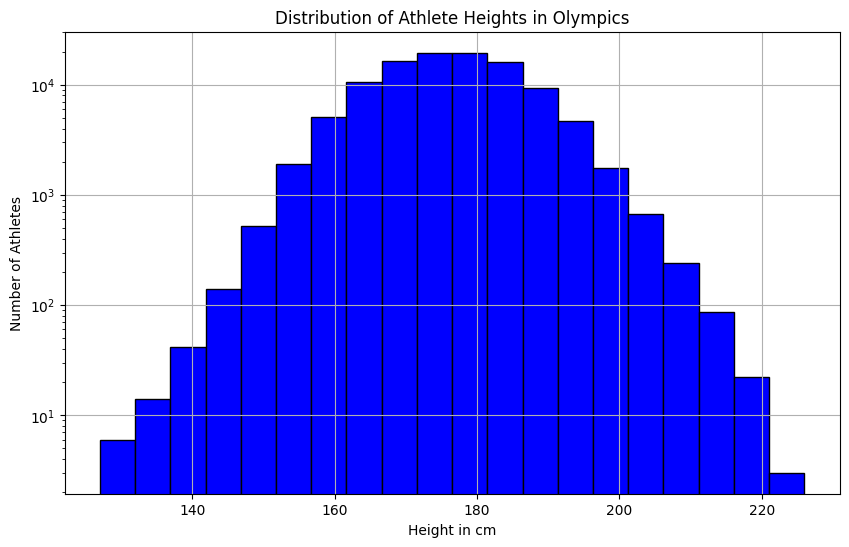

In [163]:
import pandas as pd
import matplotlib.pyplot as plt

bios_filtered = bios.dropna(subset=['height_cm'])

plt.figure(figsize=(10, 6))
plt.hist(bios_filtered['height_cm'], bins=20, color='blue', edgecolor='black')

plt.title('Distribution of Athlete Heights in Olympics')
plt.xlabel('Height in cm')
plt.ylabel('Number of Athletes')
plt.grid(True)

plt.yscale('log')

plt.show()